# Business Objective:

## The Fundamental goal here is to model the CO2 emisson as funcation of several car engine features

## Data Set Details: The file contains the data for this example Here the number of variables (columns) is 12, & the number of instance (rows) is  7385

#### Importing Libriaries

In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_colwidth',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

##### Load Dataset

In [2]:
df= pd.read_csv('co2_emissions (1).csv')
df

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

### EDA

#### Summary if the dataset

In [3]:
df.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7385.000000                 7385.000000   
mean                        10.975071                   27.481652   
std                          2.892506                    7.231879   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.600000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    7385.000000  
mean      250.584699  
std        58.512679  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       288.000000  
max       522.000000

### Getting basic info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

#### Check for NULL values

In [5]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

•There are no Null Values in the Dataset , missing value imputation is not required``

In [6]:
df.shape

(7385, 12)

In [7]:
transmission_type ={'A:Automatic','AM:Automated manual','AS:Auto(select shift)','AV:Continuously variable', 'M:Manual'}
fuel_type={"X" : 'Regular gasoline', "Z" : 'Premium gasoline', "D" : 'Diesel', "E" : 'Ethanol (E85)', "N" : 'Natural gas'}

In [8]:
df['fuel_type']=df['fuel_type'].replace(fuel_type)
df['transmission']=df['transmission'].replace(transmission_type)

In [9]:
df.head(7)

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   
5  ACURA         RLX      MID-SIZE          3.5          6           AS   
6  ACURA          TL      MID-SIZE          3.5          6           AS   

          fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0  Premium gasoline                    9.9                   6.7   
1  Premium gasoline                   11.2                   7.7   
2  Premium gasoline                    6.0                   5.8   
3  Premium gasoline                   12.7                   9.1   
4  Premium gasoline                   12.1                   8.7   
5  Premium gasoline                   11.9                   7.7   
6  Premium gasoline                   11.8                   8.1   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244  
5                            10.0                          28            230  
6                            10.1                          28            232

In [10]:
df.describe(include=object)

make          model vehicle_class transmission         fuel_type
count   7385           7385          7385         7385              7385
unique    42           2053            16            5                 5
top     FORD  F-150 FFV 4X4   SUV - SMALL           AS  Regular gasoline
freq     628             32          1217         3127              3637

### We can observe that

•The dataset has 7385 Rows and 12 Coloumns

•The 4 Columns are of type 'Float'

•The 3 Columns are of type 'Int'

•The 5 Columns are of type 'Object'(Categorical)'

•The average Co2 emissions across the dataset is 250.59 gm/Km

•The Fuel consumption is found to be greater in city than highway

•There are 42 different makers in the dataset , out of which Ford has the highest number of entries

•There are 2053 different models in the dataset , out of which F-150 FFV 4X4 has highest entries

•There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries

•There are 5 different transmission type in the dataset , out of which Auto(Select Shift) has highest entries

•There are 5 different Fuel types in the dataset , out of which most of the cares run on Regular gasoline


In [11]:
duplicate =df.duplicated().sum()

In [12]:
print('The no of duplicate in this dataset are {}'.format(duplicate))

The no of duplicate in this dataset are 1112


### Dropping Duplicates using drop_duplicates


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(6273, 12)

In [15]:
df.reset_index(inplace=True)

In [16]:
df.drop(['index'],inplace=True,axis=1)

### Seperating Numerical & Categorical Columns

In [17]:
categorical_col=[]
numberical_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical_col.append(i)
    else:
        numberical_col.append(i)

In [18]:
categorical_col

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

In [19]:
numberical_col

['engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'co2_emissions']

## Visualization

#### Univariate Analysis

Skewness-> 0.8109634973059867
Kurtosis-> -0.15317073013177973


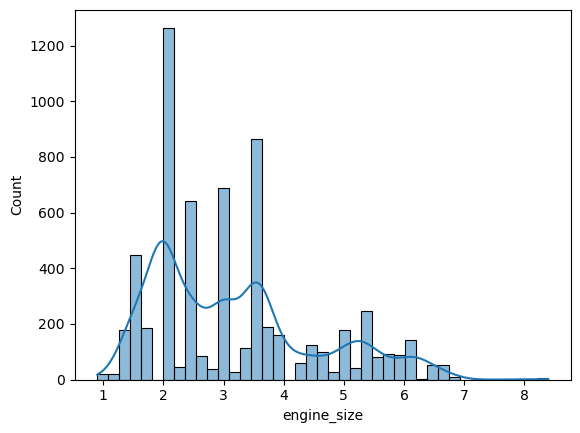

Skewness-> 1.106650710778432
Kurtosis-> 1.4350759501372607


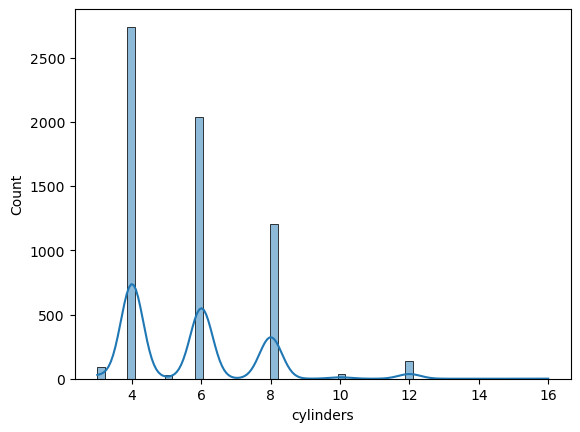

Skewness-> 0.841856275830459
Kurtosis-> 1.204763947078427


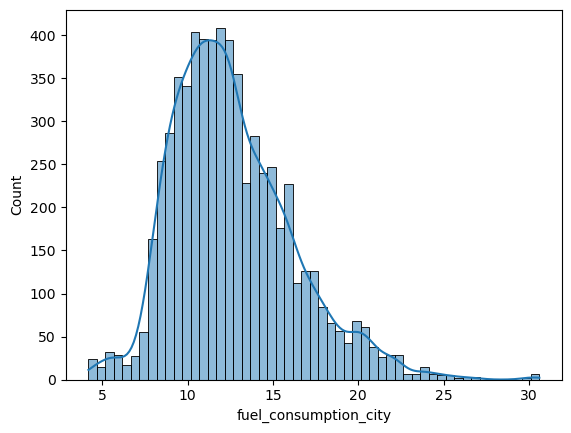

Skewness-> 1.110217266974703
Kurtosis-> 2.0054631690048454


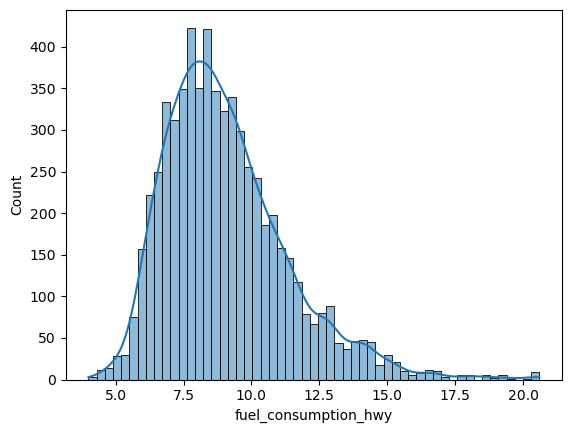

Skewness-> 0.9264095868150038
Kurtosis-> 1.4013798310237942


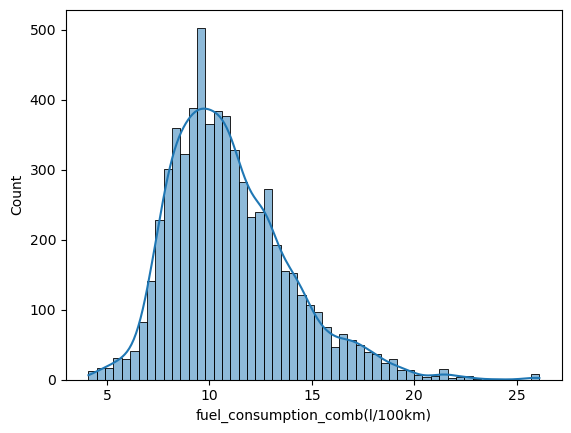

Skewness-> 0.9152769010295129
Kurtosis-> 2.2885420634399143


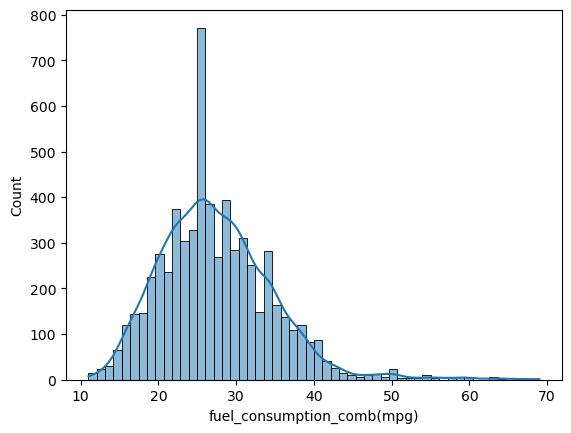

Skewness-> 0.5588650833129282
Kurtosis-> 0.44397799715675124


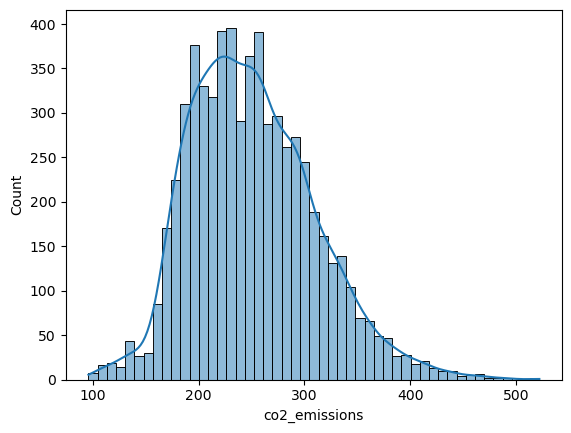

In [20]:
for i in numberical_col:
    sns.histplot(df[i],kde=True)
    print('Skewness->',df[i].skew())
    print('Kurtosis->',df[i].kurt())
    plt.show()

•'fuel_consumption_city', 'fuel_consumption_hwy','fuel_consumption_comb(l/100km)', 
'fuel_consumption_comb(mpg)', 'co2_emissions are Somewhat normally distributed with some Skewness

•'engine_size','cylinders' are not normally distributed

### Categorical Col Visualization

In [21]:
for i in categorical_col:
    print("Unique Values",df[i].value_counts().index)
    print("Counts",df[i].value_counts().values)
    print("***************************************")

Unique Values Index(['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'GMC', 'TOYOTA',
       'AUDI', 'NISSAN', 'MINI', 'JEEP', 'KIA', 'VOLKSWAGEN', 'HYUNDAI',
       'DODGE', 'HONDA', 'CADILLAC', 'LEXUS', 'MAZDA', 'SUBARU', 'JAGUAR',
       'VOLVO', 'BUICK', 'INFINITI', 'LINCOLN', 'LAND ROVER', 'MITSUBISHI',
       'RAM', 'CHRYSLER', 'FIAT', 'MASERATI', 'ACURA', 'ROLLS-ROYCE',
       'ASTON MARTIN', 'LAMBORGHINI', 'BENTLEY', 'SCION', 'ALFA ROMEO',
       'GENESIS', 'SMART', 'SRT', 'BUGATTI'],
      dtype='object')
Counts [575 515 501 365 296 289 274 263 213 200 200 192 187 184 180 159 141 129
 127 119 118 118  92  87  81  76  73  72  64  56  52  51  48  39  37  35
  21  19  14   7   2   2]
***************************************
Unique Values Index(['F-150 FFV', 'F-150 FFV 4X4', 'MUSTANG', 'FOCUS FFV', 'F-150 4X4',
       'F-150', 'SONIC 5', 'ATS', 'JETTA', 'COMPASS',
       ...
       'STINGER AWD', 'AVENTADOR S COUPE', 'AVENTADOR S ROADSTER',
       'HURACAN AWD', 'HURACAN SP

In [22]:
categorical_col

['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

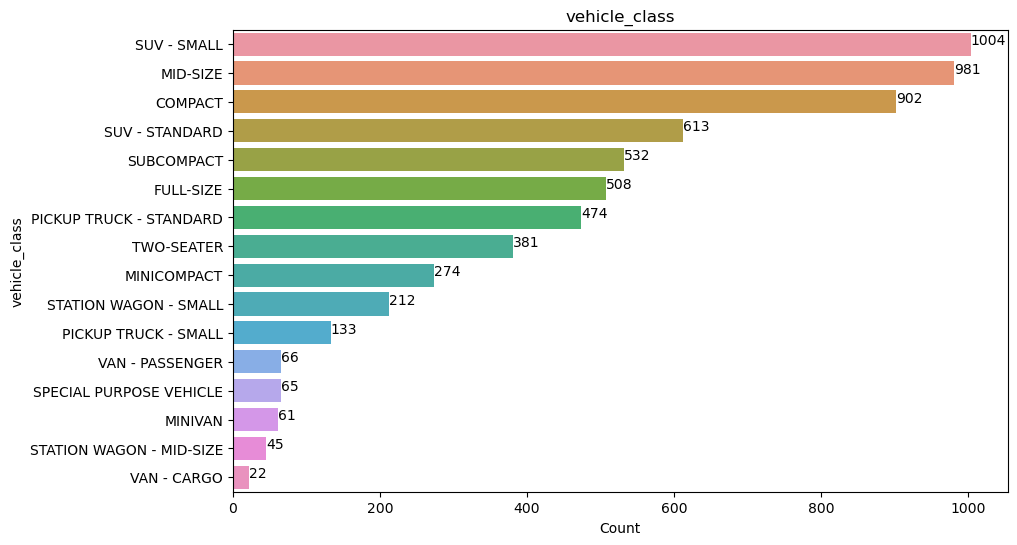

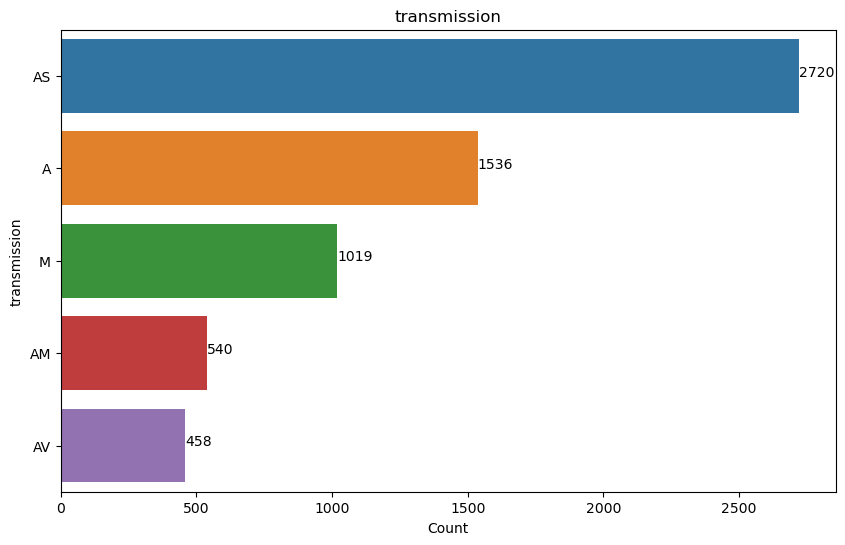

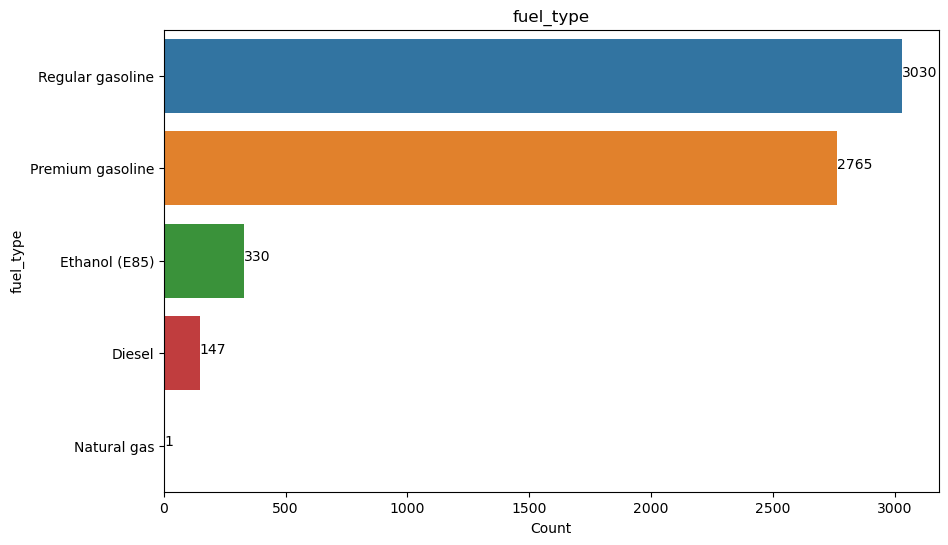

In [23]:
for i in['vehicle_class','transmission', 'fuel_type']:
    plt.figure(figsize=(10,6))
    x=df[i].value_counts().index
    y=df[i].value_counts().values
    ax=sns.barplot(y=x,x=y)
    for j,v in enumerate(df[i].value_counts().values):
        ax.text(v,j,v)
    ax.set_xlabel('Count')
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

•There are 16 different vehicle classes in the dataset , out of which SUV-SMALL has highest entries(959)

•There are 5 different transmission type in the dataset , most of the cars are Automatic(Select Shift) type (2633)

•There are 5 different Fuel types in the dataset , out of which most of the cars run on Regular gasoline(2869)

In [24]:
grouped_dt =df.groupby(['make','vehicle_class'])

In [25]:
make_list=[]
vehicle_list=[]
count_list=[]
for x,y in grouped_dt:
    make_list.append(x[0])
    vehicle_list.append(x[1])
    count_list.append(y.aggregate(np.size)['make'])

In [26]:
grp_count=pd.DataFrame({'make':make_list,'vehicle':vehicle_list,'count':count_list})
grp_count

make                   vehicle  count
0         ACURA                   COMPACT     23
1         ACURA                  MID-SIZE     10
2         ACURA               SUV - SMALL     17
3         ACURA                TWO-SEATER      1
4    ALFA ROMEO                  MID-SIZE      7
..          ...                       ...    ...
226       VOLVO                  MID-SIZE     12
227       VOLVO  STATION WAGON - MID-SIZE      8
228       VOLVO     STATION WAGON - SMALL     23
229       VOLVO               SUV - SMALL     34
230       VOLVO            SUV - STANDARD     11

[231 rows x 3 columns]

In [27]:
grp_count.nunique()

make       42
vehicle    16
count      76
dtype: int64

•While plotting the count for each vehicle class across each maker , we found out that SRT,Bugati and SMART makers have only one vehicle class type with less than 10 entries

•While Chervolet makers have different variants in the vehicle type with 13 types

•The distribution across few makers like are not evenly distributed "Jeep","RAM" and "Porchse"

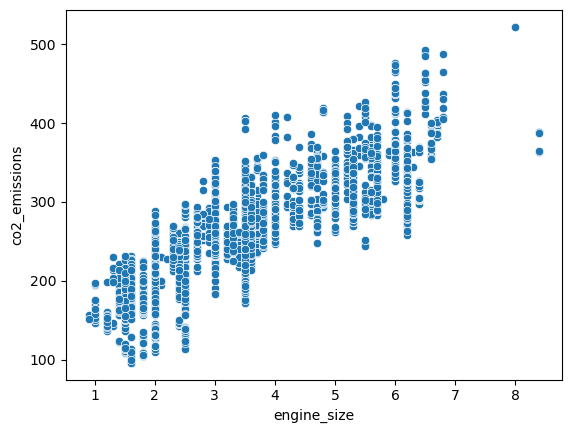

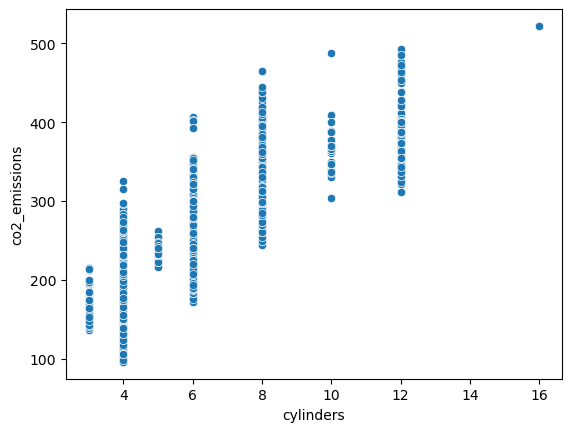

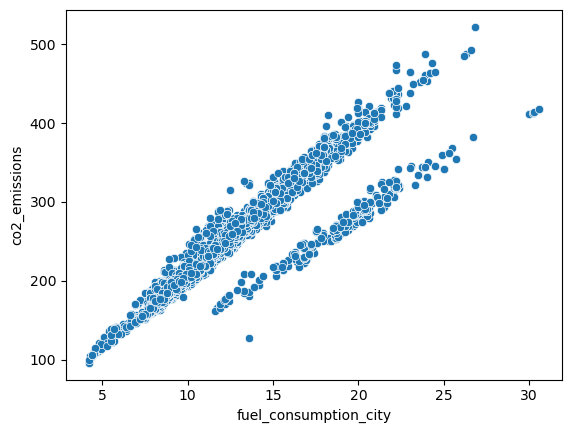

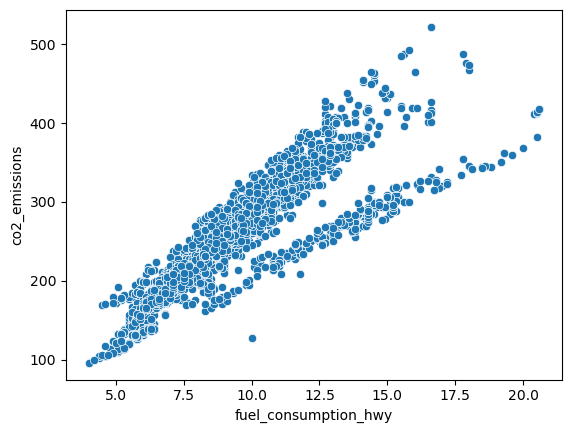

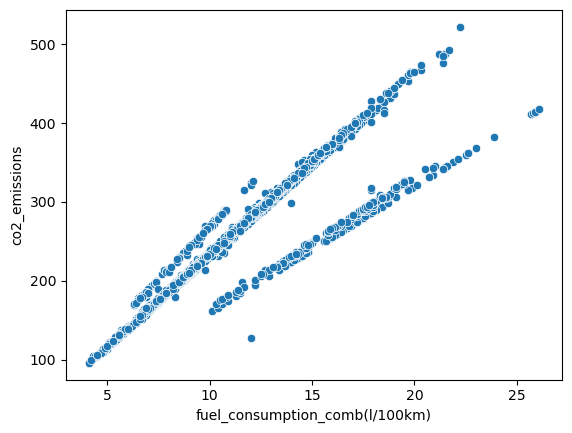

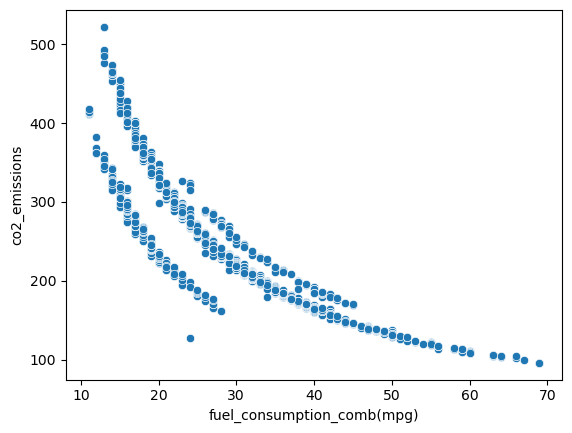

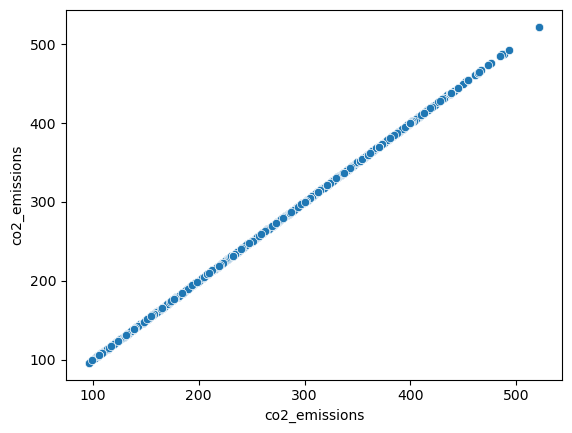

In [28]:
for i in numberical_col:
    sns.scatterplot(x=df[i],y=df['co2_emissions'])
    plt.show()

Text(0, 0.5, 'Co2 emission')

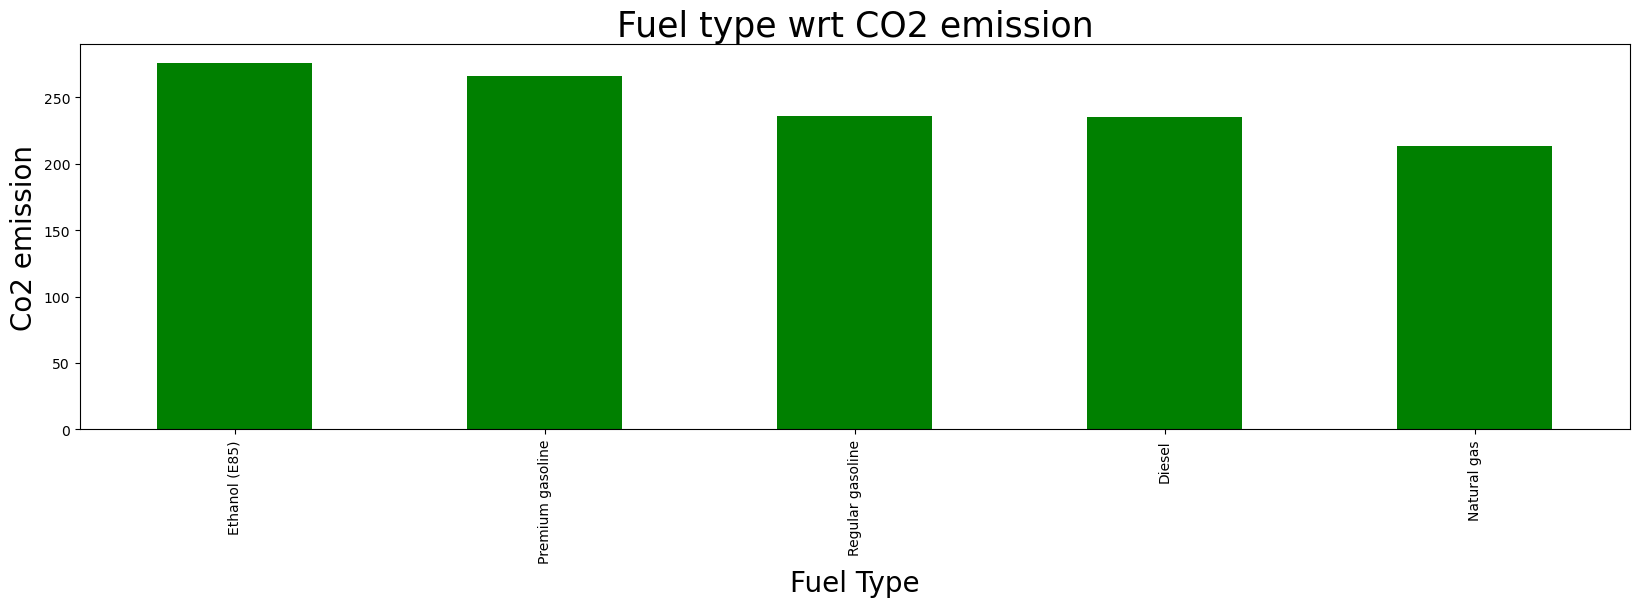

In [29]:
plt.figure(figsize=(20,5))
df
df.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)

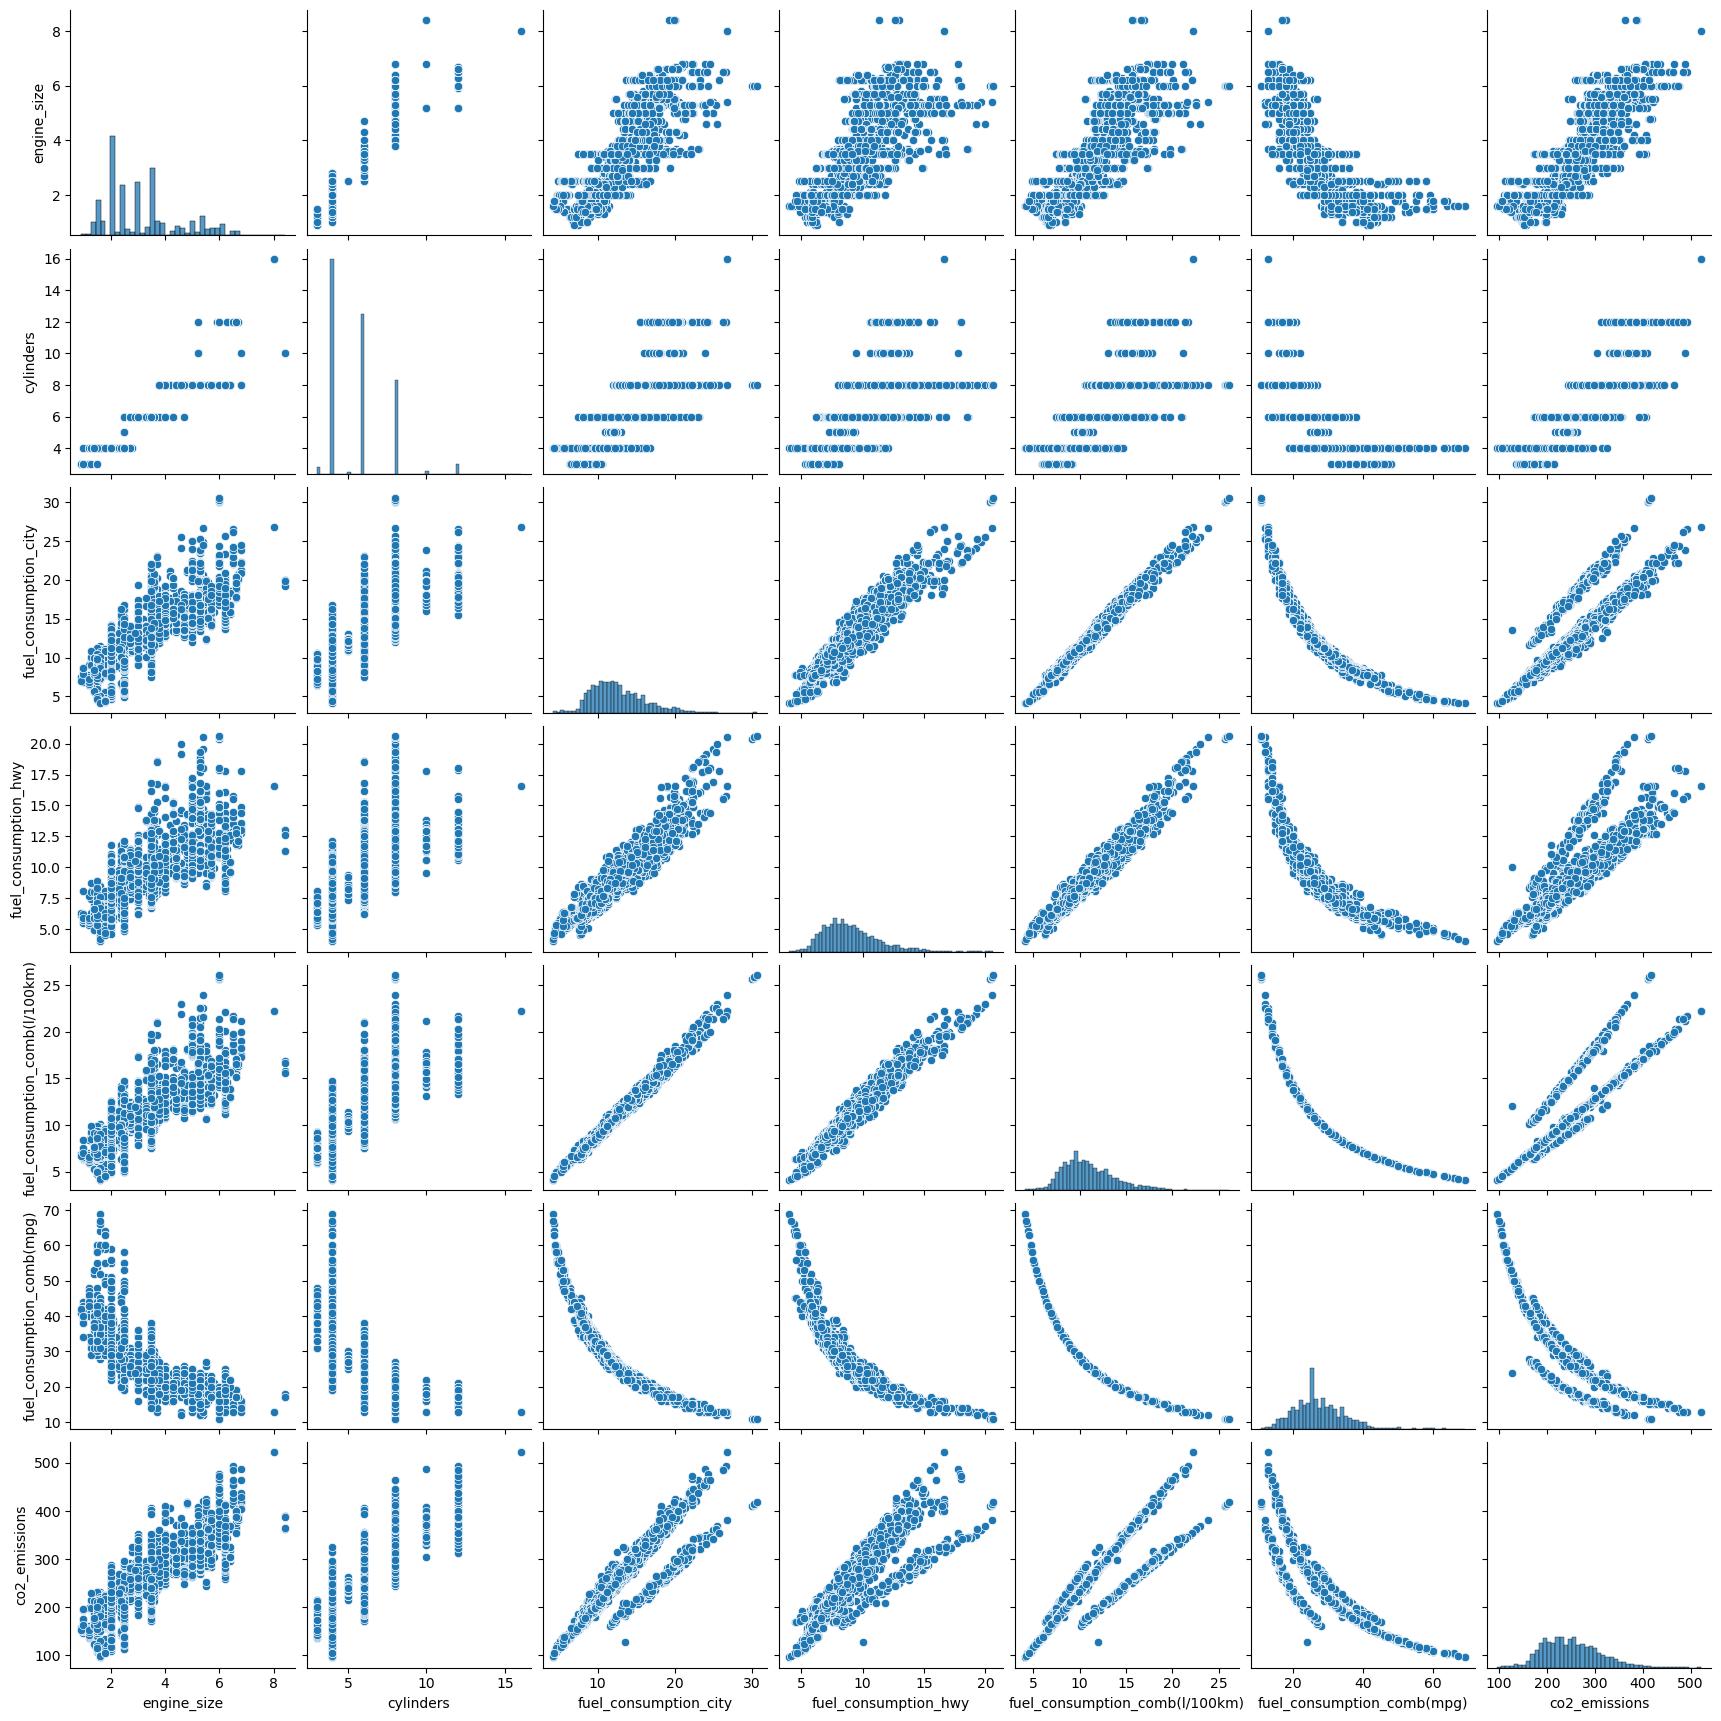

In [30]:
sns.pairplot(df)

In [31]:
#Co2 has linear relationship with engine size and fuel consumption
#As engine size increases fuel consupmtion increases and no of cylnders increases,co2 emission increases
#Fuel consumption comb has perfect correlation with fuel consumption highway and fuel consumption city
#Fuel type Ethanol is more in co2 emission and the same fuel type is mostly used in city and highway hence co2 emission would be more
##As cylnders size increases Co2 emission increases
#Co2 emission is more for fuel type Ethanol
#Fuel consumption comb has inverse inverse relationship with co2 emission
#Co2 emission is generally increasing with increase in remaining features except fuel consumption comb

<Axes: >

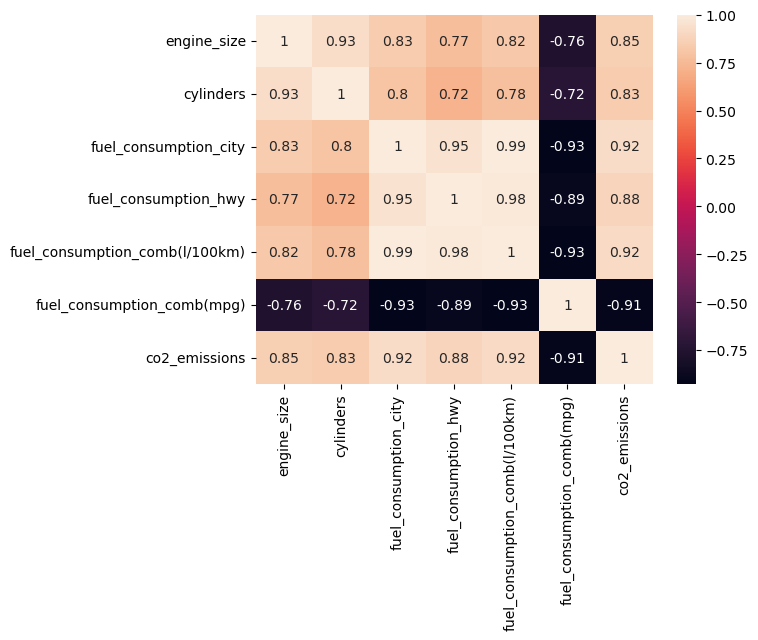

In [32]:
sns.heatmap(df.corr(),annot=True)

•co2_emission has high positive correlation with fuel_consumption_comb(0.92) and fuel_consumption_city(0.92)

•fuel consumption highway and city are also strongly correlated

In [33]:
print('Overall Average Co2_Emission(gm/kg)'
      ,df['co2_emissions'].mean())

Overall Average Co2_Emission(gm/kg) 251.24725011956002


### Categorical Data V/S Target Variable

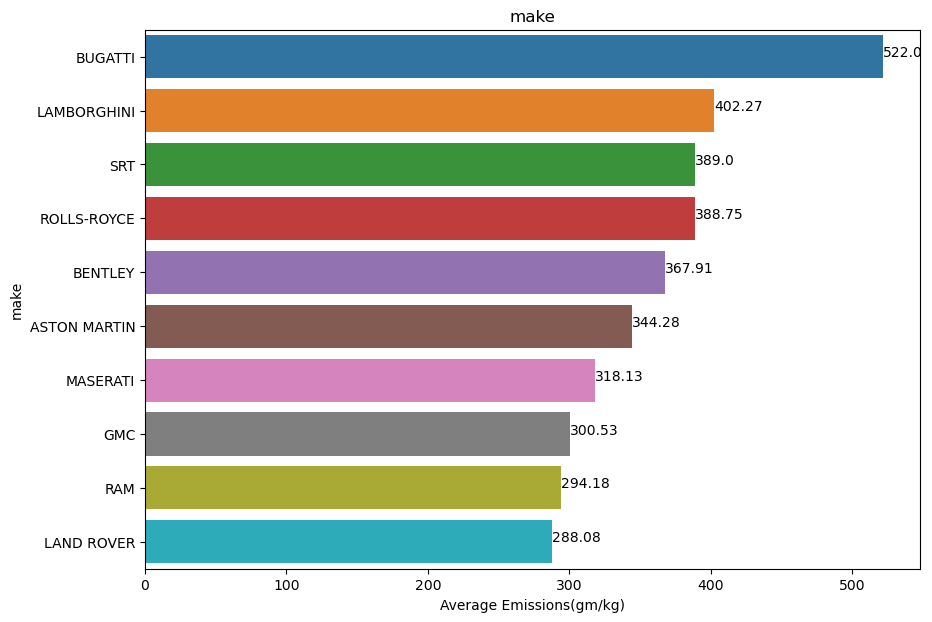

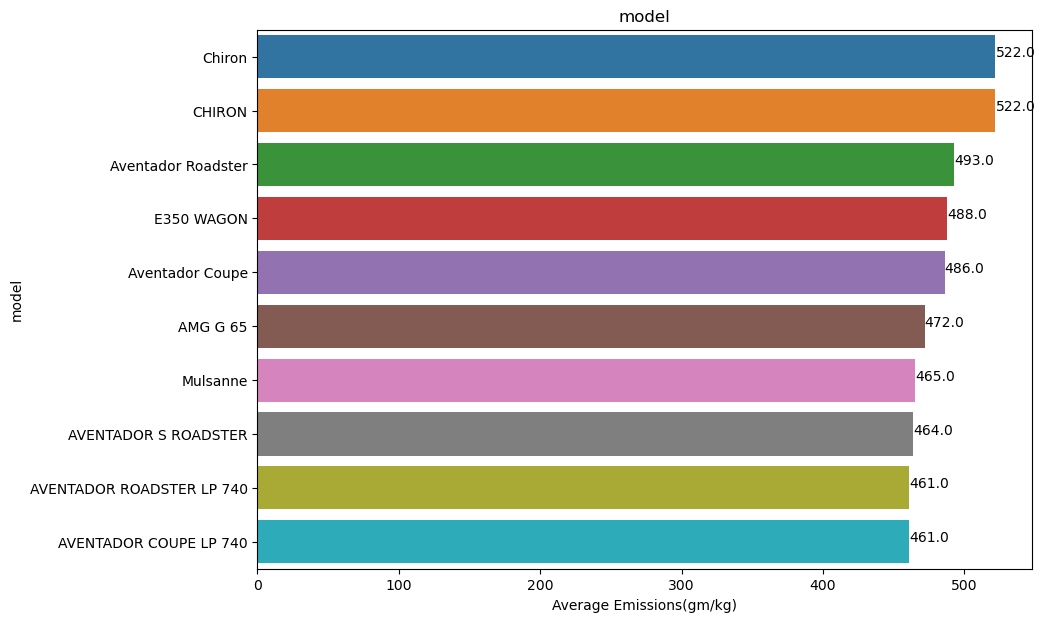

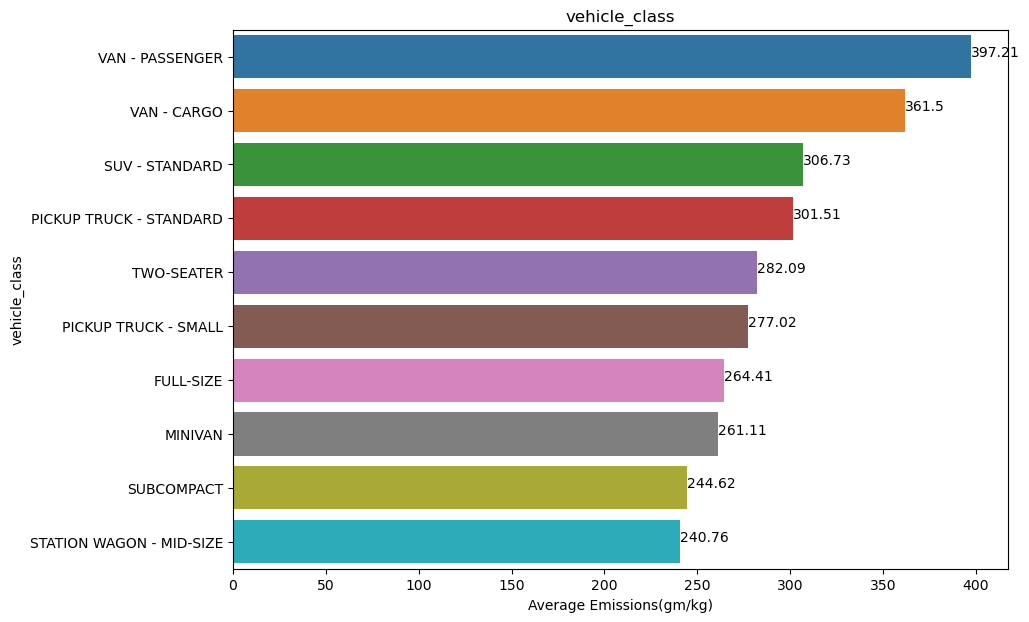

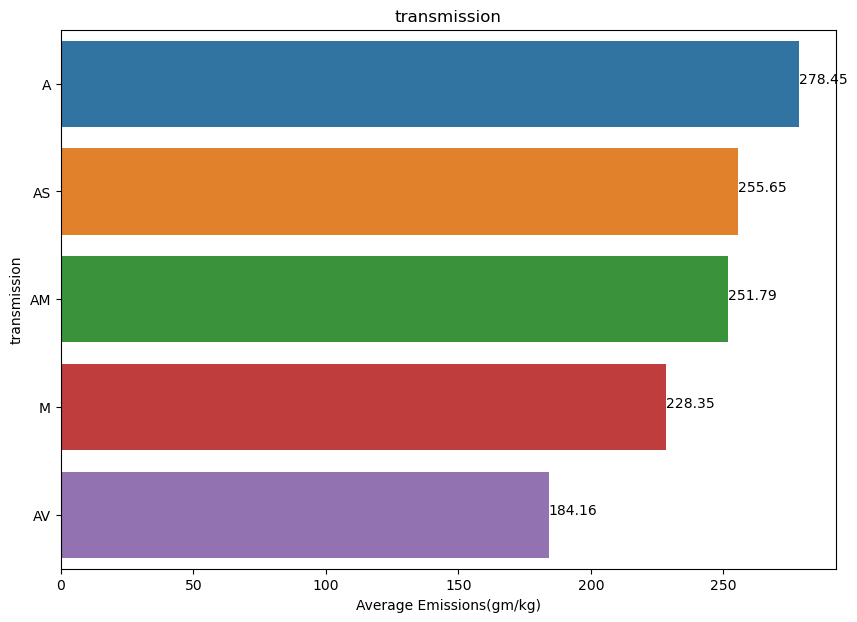

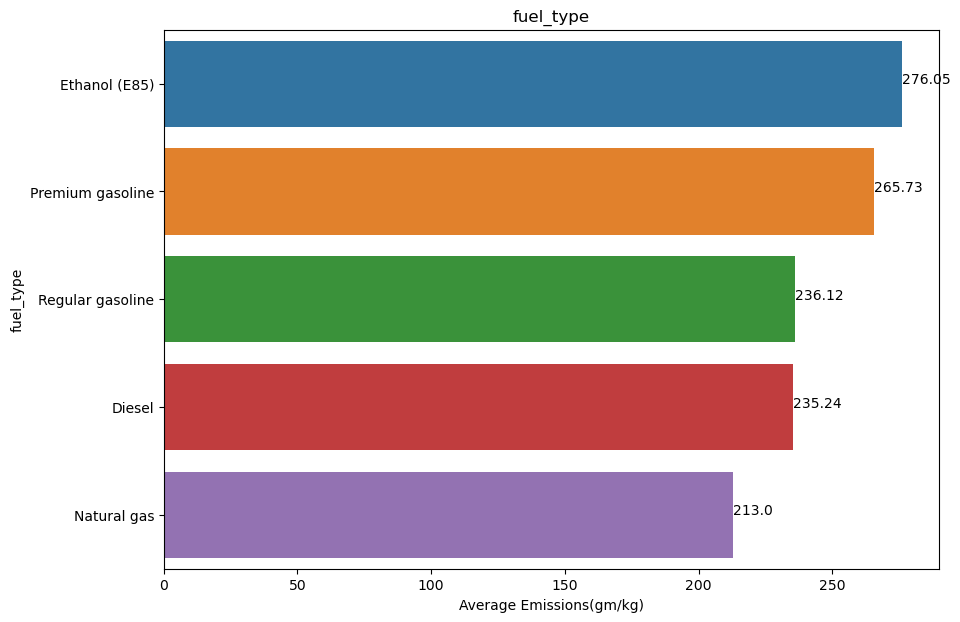

In [34]:
for i in categorical_col:
    plt.figure(figsize=(10,7))
    gruoped_dt= df.groupby(i)
    make_list=[]
    count_list=[]
    for x,y in gruoped_dt:
        make_list.append(x)
        count_list.append(np.round(y.aggregate(np.mean)['co2_emissions'],2))
        grp_count=pd.DataFrame({i:make_list,'Average Emissions(gm/kg)':count_list})
        grp_count=grp_count.sort_values(by='Average Emissions(gm/kg)',ascending=False).reset_index(drop=True)
    ax=sns.barplot(x='Average Emissions(gm/kg)',y=i,data=grp_count.head(10))
    for j,v in enumerate(grp_count['Average Emissions(gm/kg)'].head(10).values):
        ax.text(v,j,v)
    ax.set_xlabel('Average Emissions(gm/kg)')
    ax.set_ylabel(i)
    plt.title(i)
    plt.show()

→ From the above categorical plots ,we see bugatti being highest average co2_emissions among makers

→we see Chiron beign highes average co2_emission among Model

→we see Van- Passenger has highest average co2_emission among vehicle class, i.e. begger the vehicle,higher the co2_emissions

→we see automatic transformation types has the highest average co2_emission among all types

→cars using Ethonal has highest co2_emissions

→we see that only one car used Natural gas in the whole dataset

→co2_emission is positively Skewed, which implies thst the co2_emission are lower than the average emission rate

## Bivariate analysis Variation of input Feature V/S Target Variable

In [35]:
df['Vehicle_Class_Type'] = df['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'hatchback')

In [36]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'sedan')

In [37]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'suv')

In [38]:
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'truck')

In [39]:
df['Vehicle_Class_Type'].unique()

array(['hatchback', 'suv', 'sedan', 'truck'], dtype=object)

In [40]:
df=df.drop(['vehicle_class'],axis=1)

<Figure size 2100x600 with 0 Axes>

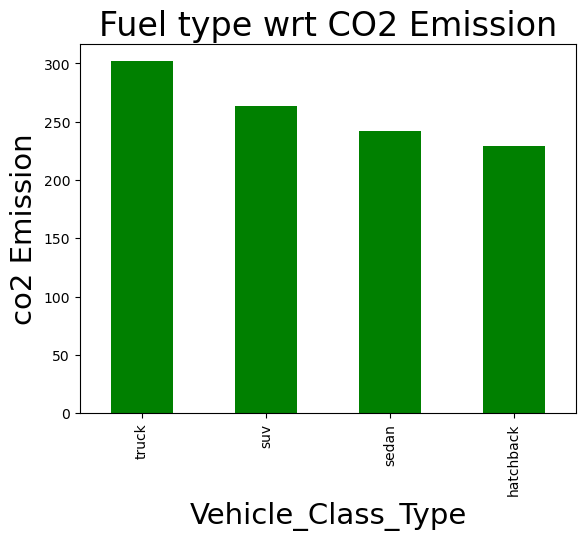

<Figure size 2100x600 with 0 Axes>

In [41]:
df.groupby('Vehicle_Class_Type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')
plt.title('Fuel type wrt CO2 Emission',fontsize=24)
plt.xlabel('Vehicle_Class_Type',fontsize=21)
plt.ylabel('co2 Emission',fontsize=21)
plt.figure(figsize=(21,6))

## →Trucks are more in Co2 Emissions

In [42]:
df['make'].nunique()

42

In [43]:
df['make1'] = df['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')

In [44]:
df['make1']=df['make1'].replace(['ALFA ROMEO','AUDI','BMW',
                                 'BUICK','CADILLAC','CHRYSLER','DODGE','GMC','INFINITI','JEEP','LAND ROVER',
                                 'LEXUS','MERCEDES-BENZ','MINI','SMART','VOLVO'],
                               'Premium')

In [45]:
df['make1'] = df['make1'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')

In [46]:
df['make1'] = df['make1'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [47]:
df['make1'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [48]:
df['make1'].value_counts()

General    2767
Premium    2731
Sports      546
Luxury      229
Name: make1, dtype: int64

In [49]:
df=df.drop(['make'],axis=1)

In [50]:
df.head()

model  engine_size  cylinders transmission         fuel_type  \
0         ILX          2.0          4           AS  Premium gasoline   
1         ILX          2.4          4            M  Premium gasoline   
2  ILX HYBRID          1.5          4           AV  Premium gasoline   
3     MDX 4WD          3.5          6           AS  Premium gasoline   
4     RDX AWD          3.5          6           AS  Premium gasoline   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   
2                    6.0                   5.8   
3                   12.7                   9.1   
4                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  \
0                             8.5                          33            196   
1                             9.6                          29            221   
2                             5.9                          48            136   
3                            11.1                          25            255   
4                            10.6                          27            244   

  Vehicle_Class_Type   make1  
0          hatchback  Luxury  
1          hatchback  Luxury  
2          hatchback  Luxury  
3                suv  Luxury  
4                suv  Luxury

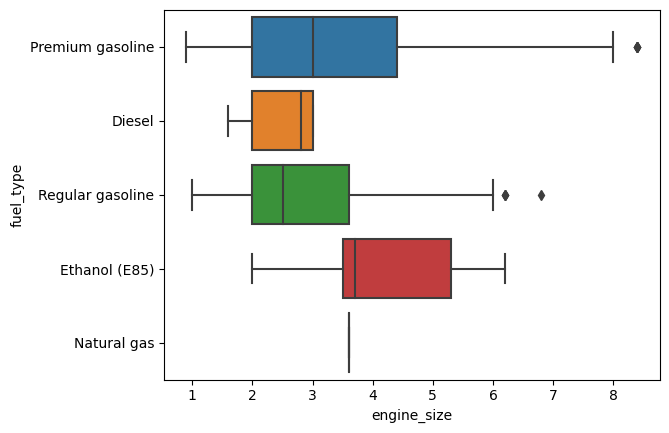

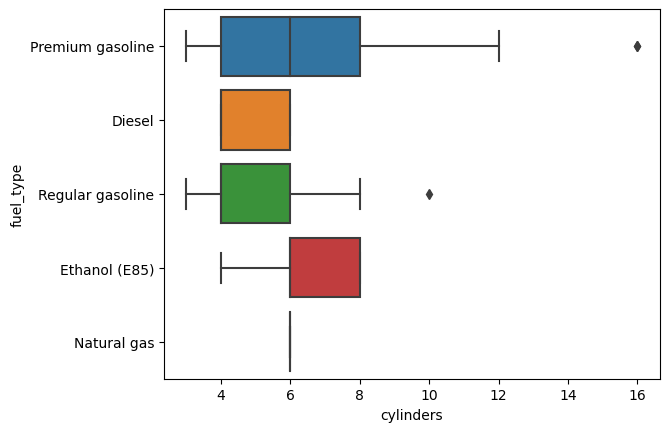

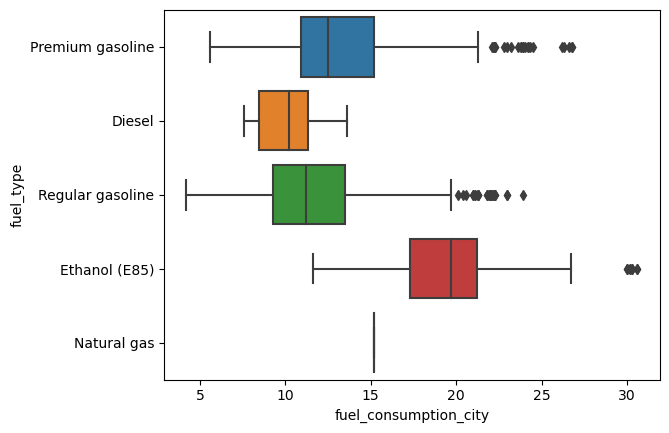

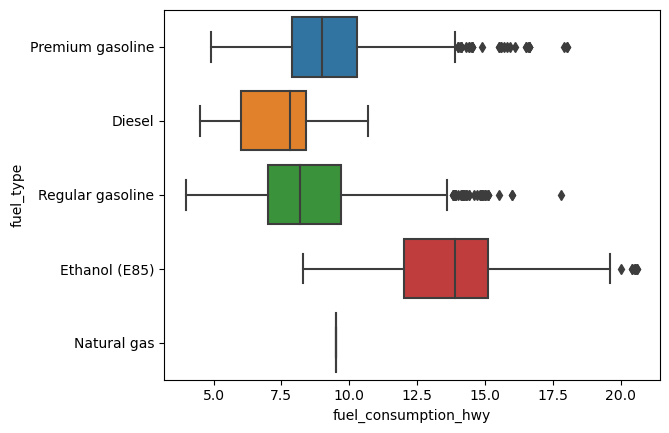

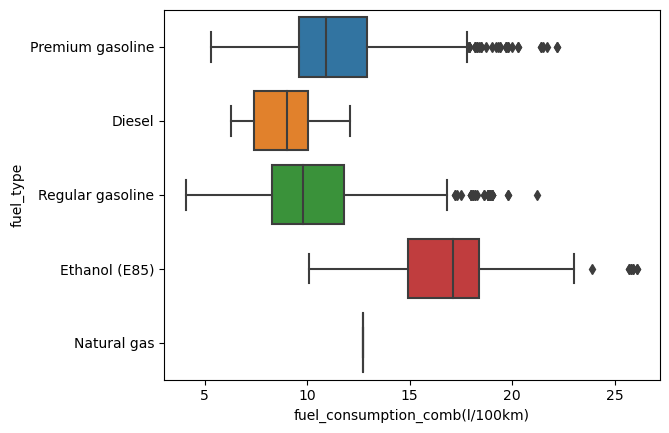

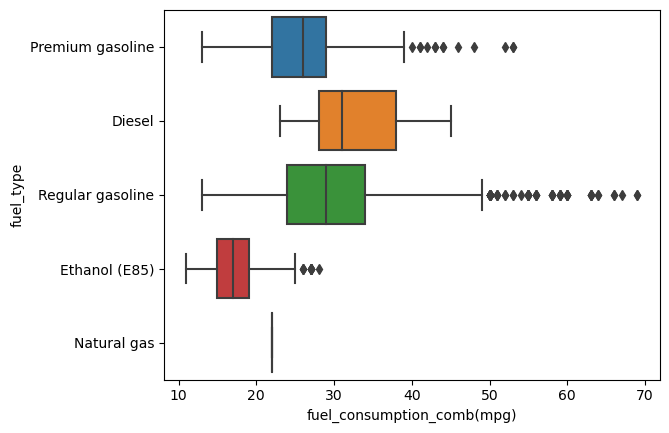

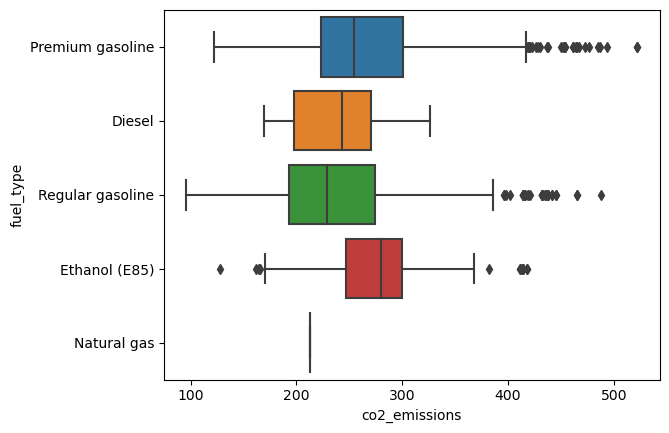

In [51]:
for i in numberical_col:
    sns.boxplot(data=df,x=i,y='fuel_type')
    plt.show()

In [52]:
dt_numberical= df.select_dtypes(include=np.number)

In [53]:
Q1=dt_numberical.quantile(0.25)
Q3=dt_numberical.quantile(0.75)
IQR=Q3-Q1

In [54]:
outlier= pd.DataFrame((dt_numberical<(Q1-1.5*IQR))|(dt_numberical>(Q3+1.5*IQR)))

In [55]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [56]:
df.shape

(5809, 12)

In [57]:
df.reset_index(inplace=True)

In [58]:
df.drop(['index'],inplace=True,axis=1)

In [59]:
df.head()

model  engine_size  cylinders transmission         fuel_type  \
0      ILX          2.0          4           AS  Premium gasoline   
1      ILX          2.4          4            M  Premium gasoline   
2  MDX 4WD          3.5          6           AS  Premium gasoline   
3  RDX AWD          3.5          6           AS  Premium gasoline   
4      RLX          3.5          6           AS  Premium gasoline   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   
1                   11.2                   7.7   
2                   12.7                   9.1   
3                   12.1                   8.7   
4                   11.9                   7.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  \
0                             8.5                          33            196   
1                             9.6                          29            221   
2                            11.1                          25            255   
3                            10.6                          27            244   
4                            10.0                          28            230   

  Vehicle_Class_Type   make1  
0          hatchback  Luxury  
1          hatchback  Luxury  
2                suv  Luxury  
3                suv  Luxury  
4              sedan  Luxury

In [60]:
df.head(1)

model  engine_size  cylinders transmission         fuel_type  \
0   ILX          2.0          4           AS  Premium gasoline   

   fuel_consumption_city  fuel_consumption_hwy  \
0                    9.9                   6.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  \
0                             8.5                          33            196   

  Vehicle_Class_Type   make1  
0          hatchback  Luxury

In [61]:
# Handle missing values if any
df = df.dropna()


In [65]:
# Convert categorical variables to numerical format if necessary
df = pd.get_dummies(df, columns=['make1', 'model', 'Vehicle_Class_Type', 'transmission', 'fuel_type'])


In [66]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['co2_emissions'])
y = df['co2_emissions']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [70]:
X_train

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
4417          2.0          4                   10.6                   7.6   
3184          1.0          3                    7.6                   5.7   
4148          5.0          8                   15.8                  10.3   
3896          2.0          4                   12.0                   8.2   
4697          5.0          8                   14.7                  11.2   
...           ...        ...                    ...                   ...   
3772          2.0          4                    9.6                   7.0   
5191          2.0          4                   11.0                   8.3   
5226          3.0          6                   11.8                   8.6   
5390          3.0          6                   12.7                   8.8   
860           2.0          4                    9.6                   7.1   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
4417                             9.3                          30   
3184                             6.8                          42   
4148                            13.3                          21   
3896                            10.3                          27   
4697                            13.1                          22   
...                              ...                         ...   
3772                             8.4                          34   
5191                             9.8                          29   
5226                            10.4                          27   
5390                            10.9                          26   
860                              8.5                          33   

      make1_General  make1_Luxury  make1_Premium  make1_Sports  \
4417              0             0              1             0   
3184              1             0              0             0   
4148              0             0              0             1   
3896              0             0              1             0   
4697              1             0              0             0   
...             ...           ...            ...           ...   
3772              0             0              1             0   
5191              0             0              0             1   
5226              1             0              0             0   
5390              0             0              1             0   
860               1             0              0             0   

      model_124 SPIDER  model_124 Spider  model_1500  model_1500 (MDS)  \
4417                 0                 0           0                 0   
3184                 0                 0           0                 0   
4148                 0                 0           0                 0   
3896                 0                 0           0                 0   
4697                 0                 0           0                 0   
...                ...               ...         ...               ...   
3772                 0                 0           0                 0   
5191                 0                 0           0                 0   
5226                 0                 0           0                 0   
5390                 0                 0           0                 0   
860                  0                 0           0                 0   

      model_1500 4X4  model_1500 4X4 (MDS)  model_1500 4X4 DIESEL  \
4417               0                     0                      0   
3184               0                     0                      0   
4148               0                     0                      0   
3896               0                     0                      0   
4697               0                     0                      0   
...              ...                   ...                    ...   
3772               0                     0                      0   
5191               0          

In [71]:
X_test

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
501           3.2          6                   13.4                   9.5   
3164          3.5          6                   13.0                  10.2   
3955          2.0          4                   11.7                   9.0   
5474          2.7          4                   11.9                  10.3   
4899          5.7          8                   16.7                  10.9   
...           ...        ...                    ...                   ...   
2080          5.3          8                   20.5                  14.0   
2929          2.0          4                   10.5                   7.4   
4776          6.2          8                   15.5                  11.9   
607           3.0          6                   15.2                   9.6   
4769          5.3          8                   14.3                  10.4   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
501                             11.6                          24   
3164                            11.7                          24   
3955                            10.5                          27   
5474                            11.1                          25   
4899                            14.1                          20   
...                              ...                         ...   
2080                            17.6                          16   
2929                             9.1                          31   
4776                            13.9                          20   
607                             12.7                          22   
4769                            12.5                          23   

      make1_General  make1_Luxury  make1_Premium  make1_Sports  \
501               0             0              1             0   
3164              1             0              0             0   
3955              1             0              0             0   
5474              1             0              0             0   
4899              0             0              1             0   
...             ...           ...            ...           ...   
2080              1             0              0             0   
2929              0             0              1             0   
4776              0             0              1             0   
607               0             0              0             1   
4769              0             0              1             0   

      model_124 SPIDER  model_124 Spider  model_1500  model_1500 (MDS)  \
501                  0                 0           0                 0   
3164                 0                 0           0                 0   
3955                 0                 0           0                 0   
5474                 0                 0           0                 0   
4899                 0                 0           0                 0   
...                ...               ...         ...               ...   
2080                 0                 0           0                 0   
2929                 0                 0           0                 0   
4776                 0                 0           0                 0   
607                  0                 0           0                 0   
4769                 0                 0           0                 0   

      model_1500 4X4  model_1500 4X4 (MDS)  model_1500 4X4 DIESEL  \
501                0                     0                      0   
3164               0                     0                      0   
3955               0                     0                      0   
5474               0                     0                      0   
4899               0                     0                      0   
...              ...                   ...                    ...   
2080               0                     0                      0   
2929               0          

In [68]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.1350895222437524e+23
R-squared: -8.357725608044379e+19


In [73]:
import pickle
import joblib
joblib.dump(model,'co2_emi.pkl')

['co2_emi.pkl']

In [75]:
loaded_model = joblib.load('co2_emi.pkl')
y_pred = loaded_model.predict(X_test)